In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [39]:
df = pd.read_excel(r'C:\Users\David\Projects\Process Capability Analysis\PistonRingDiameter.xlsx')
df.head()

,Diameter
0,74.030
1,74.002
2,74.019
3,73.992
4,74.008


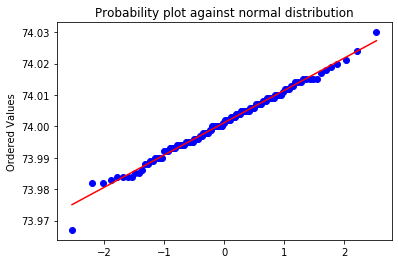

In [40]:
#Test normality of data distribution
fig = plt.figure()
ax1 = fig.add_subplot(111)
prob = stats.probplot(df['Diameter'], dist=stats.norm,plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probability plot against normal distribution')
plt.show()

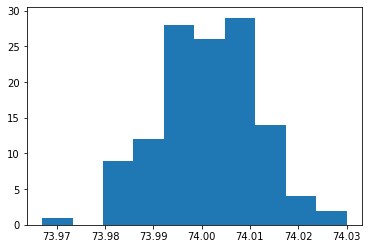

In [41]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot = plt.hist(df['Diameter'])
plt.show()

In [42]:
#Perform Anderson-Darling test to test if the null hypothesis sample from a population follows a particular distribution.
stats.anderson(df['Diameter'], dist='norm') # To test fi the distribution is normal.

AndersonResult(statistic=0.19333225380320584, critical_values=array([0.559, 0.637, 0.764, 0.891, 1.06 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

- Returns the Anderson-Darling stat: a list of critical values for this distribution, and a list of significane levels for the corresponding critical values in percent.
- If the returned stat is larger than the critical value at the chosen significant level, the null hypothesis can be rejected that says that the data is from a normal distribution.
- In this instance, the Anderson-Darling statistic is 0.1933, smaller than 0.764. The critical value is at 5% significant level. Thus, we can't reject the null hypothesis and conclude that the distribution is normal.

In [43]:
stats.normaltest(df['Diameter'])

NormaltestResult(statistic=1.244555012372961, pvalue=0.5367206599196641)

- The above conclusion is confirmed by the test using stats.normaltest() function.
- The stats.normaltest() function, based on D'Agostino and Pearson's test that skew and kurtosis, tests the null hypothesis that the distributionis normal.
- Since the p-value from this test is 0.5367, larger than 0.05, the distribution of the data is normal.

In [44]:
x = df['Diameter']
# Define the Cp index
def Cp(x, usl, lsl):
    sigma = x.std()
    Cp = (usl - lsl) / (6*sigma)
    return Cp

In [45]:
# Define the CPk index
def Cpk(x, usl, lsl):
    sigma = x.std()
    m = x.mean()
    Cpu = (usl - m) / (3*sigma)
    Cpl = (m - lsl) / (3*sigma)
    Cpk = np.min([Cpu, Cpl] )
    return Cpk

In [46]:
#Define the specifications limits
usl = 74.05
lsl = 73.95

In [47]:
# Calculate the Cp value
Cp = Cp(x, usl, lsl)
print("Cp is: ", Cp)

Cp is:  1.6341663028555253


In [48]:
Cpk = Cpk = Cpk(x, usl, lsl)
print("Cpk is: ", Cpk)

Cpk is:  1.5957307114127943


In [49]:
sigma = x.std()
m = x.mean()
Cpu = (usl - m) / (3*sigma)
Cpu

1.5957307114127943

In [50]:
Cpl = (m - lsl) / (3*sigma)
Cpl

1.6726018942982561